In [1]:
import lalsimulation,lal
import matplotlib.pyplot as plt
import numpy as np
import subprocess

In [2]:
# Define binary parameters
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 8. #Frequency of the 22 mode at which the signal starts
distance = 500.0*lal.PC_SI
spin1_z = 0.
spin2_z =  0.
deltaT = 1./16384.
omega220 = 1123.5069271284310162
tau220 = 1./173.3968451846601795
omega210 = 964.6776207864362505
tau210 = 1./175.9653077165579305
omega330 = 1781.0465134410869723
tau330 = 1./177.9760463156193850
omega440 = 2412.2798579678869828
tau440 = 1./180.9814369861043417
omega550 = 3030.4686619613758012
tau550 = 1./182.7198010010346820

... omega220, tau220: 561.75 Hz, 0.00 Hz
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2


/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


... omega220, tau220: 674.10 Hz, 0.00 Hz
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2


/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


... omega220, tau220: 786.45 Hz, 0.00 Hz
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
... omega220, tau220: 898.81 Hz, 0.00 Hz
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
... omega220, tau220: 1011.16 Hz, 0.01 Hz
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
... omega220, tau220: 1123.51 Hz, 0.01 Hz
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
... omega220, tau220: 1235.86 Hz, 0.01 Hz
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
... omega220, tau220: 1348.21 Hz, 0.01 Hz
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
... omega220, tau220: 1460.56 Hz, 0.01 Hz
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
... omega220, tau220: 1572.91 Hz, 0.01 Hz
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loa

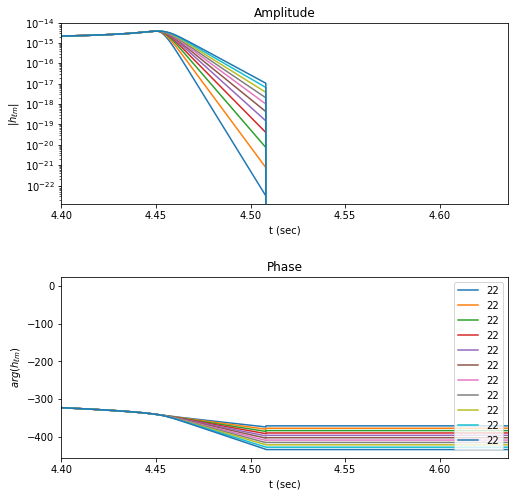

In [5]:
omega220_list = np.linspace(0.5*omega220, 1.5*omega220, 11)
tau220_list = np.linspace(0.5*tau220, 1.5*tau220, 11)

plt.figure(figsize=(8,8))
for (omega220, tau220) in zip(omega220_list, tau220_list):
        print '... omega220, tau220: %.2f Hz, %.2f Hz'%(omega220, tau220)
    
        # Generate the modes
        sphtseries, dyn, dynHi = lalsimulation.SimIMRSpinAlignedEOBModes(deltaT, m1, m2, f_start22, distance, spin1_z, spin2_z,41, 0., 0., 0.,0.,0.,0.,0.,0.,1.,1., omega220, tau220, omega210, tau210, omega330, tau330, omega440, tau440, omega550, tau550, nqcCoeffsInput, 0)

        # Read the modes
        hlm = {}

        ##55 mode
        modeL = sphtseries.l
        modeM = sphtseries.m
        print 'Loading mode', modeL, modeM
        h55 = sphtseries.mode.data.data #This is h_55
        hlm[(modeL, modeM)] = h55

        ##44 mode
        modeL = sphtseries.next.l
        modeM = sphtseries.next.m
        print 'Loading mode', modeL, modeM
        h44 = sphtseries.next.mode.data.data #This is h_44
        hlm[(modeL, modeM)] = h44

        ##21 mode
        modeL = sphtseries.next.next.l
        modeM = sphtseries.next.next.m
        print 'Loading mode', modeL, modeM
        h21 = sphtseries.next.next.mode.data.data #This is h_21
        hlm[(modeL, modeM)] = h21

        ##33 mode
        modeL = sphtseries.next.next.next.l
        modeM = sphtseries.next.next.next.m
        print 'Loading mode', modeL, modeM
        h33 = sphtseries.next.next.next.mode.data.data #This is h_33
        hlm[(modeL, modeM)] = h33
        
        ##22 mode
        modeL = sphtseries.next.next.next.next.l
        modeM = sphtseries.next.next.next.next.m
        print 'Loading mode', modeL, modeM
        h22 = sphtseries.next.next.next.next.mode.data.data #This is h_22
        hlm[(modeL, modeM)] = h22

        ##time array (s)
        time_array = np.arange(0,len(h22)*deltaT,deltaT)

        # Plotting amplitude and phase of the single modes

        plt.subplot(211)
        plt.semilogy(time_array,np.abs(h22), label='22')
        plt.xlabel('t (sec)')
        plt.ylabel('$|h_{\ell m}|$')
        plt.title('Amplitude')
        plt.xlim([4.4, time_array[-1]])
        plt.subplot(212)
        plt.plot(time_array,np.unwrap(np.angle(h22)), label='22')
        plt.xlabel('t (sec)')
        plt.ylabel('$arg(h_{\ell m})$')
        plt.title('Phase')
        plt.xlabel('t (sec)')
        plt.legend()
        plt.subplots_adjust(hspace=0.4)
        plt.xlim([4.4, time_array[-1]])
        plt.hold(True)
        
        # Generate the full waveform
        inclination = 0.
        hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, None, lalsimulation.SEOBNRv4HM)
        h = hp.data.data - 1j*hc.data.data
        
plt.show()        